<div style="border-radius:10px; padding: 30px; background-color: #c0e5e9; font-size:70%; text-align:left"><p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:navy;"> 🎓World University Rankings🎓 </p>  
<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;">Hamed Mahmoudi</p> </div> 

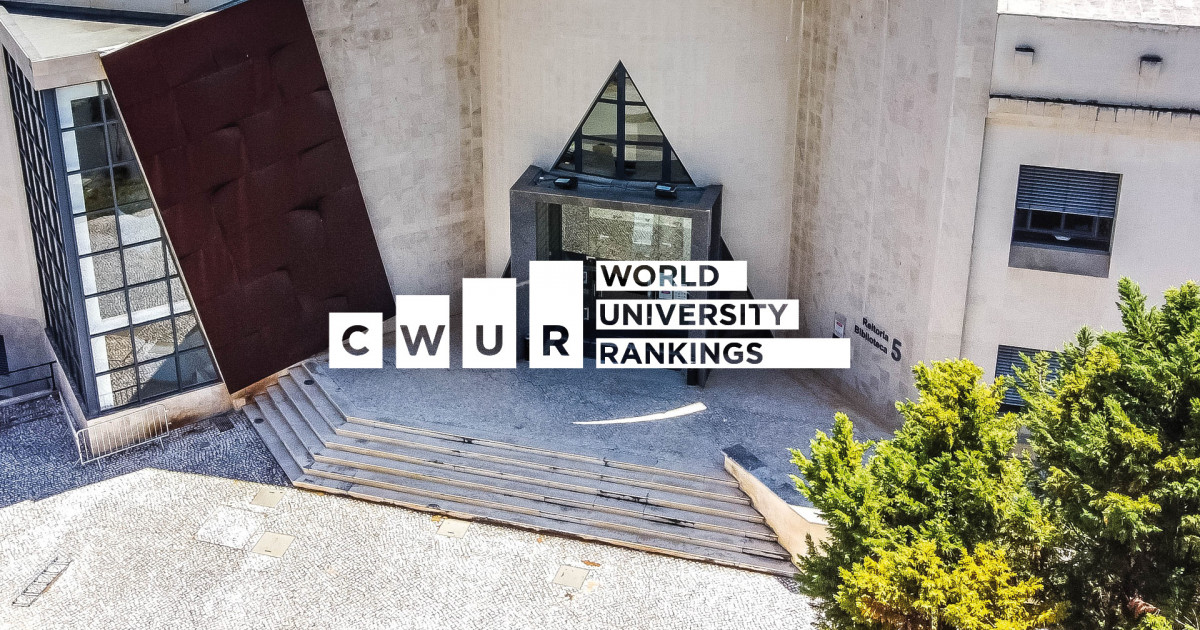

<a id="c_table"></a>
<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">
  <h3 align="left"><font color=navy>World University Rankings 🎓</font></h3>
  <p><font color=navy>The <strong>Center for World University Rankings (CWUR)</strong> evaluates global universities based on four key performance indicators:</font></p>
  <ul>
    <li><font color=navy><strong>Education (25%)</strong>: Assessed by the number of alumni who have received prestigious academic distinctions, relative to the university's size.</font></li>
    <li><font color=navy><strong>Employability (25%)</strong>: Gauged by the number of alumni in top executive positions at major companies, again relative to size.</font></li>
    <li><font color=navy><strong>Faculty (10%)</strong>: Measured by the number of faculty members recognized with prestigious academic awards.</font></li>
    <li><font color=navy><strong>Research</strong>: Comprising four sub-criteria, each accounting for 10% of the total score:
      <ol>
        <li><font color=navy>Research Output: Total number of research papers.</font></li>
        <li><font color=navy>High-Quality Publications: Papers in top-tier journals.</font></li>
        <li><font color=navy>Influence: Papers in highly-influential journals.</font></li>
        <li><font color=navy>Citations: Number of highly-cited papers.</font></li>
      </ol>
    </font></li>
  </ul>
  <p><font color=navy>This methodology does not rely on surveys or data submissions by universities, ensuring an objective and robust ranking system.</font></p>
</div>


<a id="c_table"></a> 

<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">

<h3 align="left"><font color=navy>Table of Contents:</font></h3>

* [1 | Libraries📚](#lib)
* [2 | Importing Dataset🗄](#data)
* [3 | Dataset Description📖](#datades)
* [4 | Preprocessing🎓](#preprocessing)
    - [4.1 - Columns name correction](#CNC)
    - [4.2 - Institution column correction](#ICC)
    - [4.3 - Check for Duplicate values](#dup)
    - [4.4 - filling missing values](#missing)
* [5 | adding new features and creating new dataframe📝](#feature)
* [6 | Visualizing📈](#Visualizing)
    

<a id="lib"></a>
<p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries 📚</p>

⬆️ [Table of Contents](#c_table)

In [1]:
!pip install countryinfo
!pip install dash

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import unicodedata
from countryinfo import CountryInfo
from dash import Dash, dcc, html, Input, Output

<a id="data"></a>
<p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Importing Dataset🗄</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<font color=black>The dataset was originally encoded using Windows-1252 encoding, but we will utilize Unicode Escape encoding to identify any necessary changes.

In [3]:
data = pd.read_csv('/kaggle/input/eighteen-nineteen-university-datasets/eighteen_nineteen_university_datasets.csv', encoding = 'unicode_escape')
df = pd.DataFrame(data)
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

<a id="datades"></a>
<p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">3 - Dataset Description📖</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<font color=black>We are reviewing the dataset’s summary statistics and information.

In [4]:
df.describe(include = 'all').T

count unique                 top freq     mean  \
World Rank            1000.0    NaN                 NaN  NaN    500.5   
Institution             1000   1000  Harvard University    1      NaN   
Location                1000     61                 USA  213      NaN   
National Rank         1000.0    NaN                 NaN  NaN   40.023   
Quality of Education    1000    404                   -  597      NaN   
Alumni Employment       1000    492              > 1000  509      NaN   
Quality of Faculty      1000    221                   -  731      NaN   
Research Output         1000    905              > 1000   77      NaN   
Quality Publications    1000    892              > 1000   51      NaN   
Influence               1000    830              > 1000  171      NaN   
Citations               1000     75                 898  129      NaN   
Score                 1000.0    NaN                 NaN  NaN  75.0343   

                             std   min     25%    50%     75%     max  
World Rank            288.819436   1.0  250.75  500.5  750.25  1000.0  
Institution                  NaN   NaN     NaN    NaN     NaN     NaN  
Location                     NaN   NaN     NaN    NaN     NaN     NaN  
National Rank           49.22871   1.0     6.0   21.0    51.0   213.0  
Quality of Education         NaN   NaN     NaN    NaN     NaN     NaN  
Alumni Employment            NaN   NaN     NaN    NaN     NaN     NaN  
Quality of Faculty           NaN   NaN     NaN    NaN     NaN     NaN  
Research Output              NaN   NaN     NaN    NaN     NaN     NaN  
Quality Publications         NaN   NaN     NaN    NaN     NaN     NaN  
Influence                    NaN   NaN     NaN    NaN     NaN     NaN  
Citations                    NaN   NaN     NaN    NaN     NaN     NaN  
Score                   4.670858  69.8    71.5  73.75    77.3   100.0

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

<h3 align="left" style="color:navy;">Summary Statistics:</h3>
<font color=navy>
<ul>
  <li>No <strong>NaN</strong> values are present; however, placeholders such as <strong>"-"</strong> and <strong>"> 1000"</strong> are used.</li>
  <li><strong>Harvard University</strong> holds the top ranking among all listed universities.</li>
  <li>A significant proportion of the universities, approximately <strong>213</strong>, are located in <strong>America</strong>.</li>
</ul>
    </font>
</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 12 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   World Rank            1000 non-null   int64  

 1   Institution           1000 non-null   object 

 2   Location              1000 non-null   object 

 3   National Rank         1000 non-null   int64  

 4   Quality of Education  1000 non-null   object 

 5   Alumni Employment     1000 non-null   object 

 6   Quality of Faculty    1000 non-null   object 

 7   Research Output       1000 non-null   object 

 8   Quality Publications  1000 non-null   object 

 9   Influence             1000 non-null   object 

 10  Citations             1000 non-null   object 

 11  Score                 1000 non-null   float64

dtypes: float64(1), int64(2), object(9)

memory usage: 93.9+ KB


<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">

<h3 align="left" style="color:navy;">Information:</h3>
<font color=navy>
<ul>
  <li><strong>Entries:</strong> The dataset comprises <strong>12 columns</strong> (including the target variable) with <mark>1000 rows</mark>.</li>
  <li><strong>Data Types:</strong> 
    <ul>
      <li>Except for <mark>World Rank</mark>, <mark>National Rank</mark>, and <mark>Score</mark>, other features are represented as object data.</li>
      <li><strong>2 columns</strong> are of the <strong>int64</strong> data type and represent integer values.</li>
      <li><strong>1 column</strong> is of the <strong>float64</strong> data type and represents decimal value.</li>
    </ul>
  </li>
  <li><strong>Missing Values:</strong> At first glance, there appear to be no missing values in the dataset; however, a thorough inspection is required.</li>
</ul>
    </font>
</div>


<a id="preprocessing"></a>
<p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - Preprocessing🎓</p>

⬆️ [Table of Contents](#c_table)

<a id="CNC"></a>
<p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.1 - <span style="color:steelblue;font-weight:bold">Columns name correction
    
⬆️ [Section](#preprocessing)

In [6]:
columns_name = list(df.columns)
columns_name

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality\xa0of Education',
 'Alumni Employment',
 'Quality\xa0of Faculty',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">The dataset contains undefined characters represented by <strong>\xa0</strong> which need to be replaced.</p>
</div>

In [7]:
clean_columns = [unicodedata.normalize('NFKC', col) for col in columns_name]
df.columns = clean_columns
list(df.columns)

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality of Education',
 'Alumni Employment',
 'Quality of Faculty',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">We applied <strong>unicodedata.normalize('NFKC')</strong> to replace the non-breaking space characters denoted by <strong>\xa0</strong>.</p>
</div>

<a id="ICC"></a>
<p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.2 - <span style="color:steelblue;font-weight:bold">Institution column correction
    
⬆️ [Section](#preprocessing)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">Upon examining the 'Institution' column, we identified characters such as <strong>\x96</strong>, <strong>\x92</strong>, and <strong>?</strong> that require correction.</p>
</div> 

In [8]:
df['Institution'] = df['Institution'].str.replace('\x96', '-')
df['Institution'] = df['Institution'].str.replace('\x92', "'")

In [9]:
question_mark_rows = df[df['Institution'].str.contains('\?')]
question_mark_rows

World Rank                                      Institution  \
739         740                              Bo?aziçi University   
740         741             Adam Mickiewicz University in Pozna?   
775         776                            University of Wroc?aw   
801         802                          Babe?-Bolyai University   
843         844     Wroc?aw University of Science and Technology   
929         930  University of South Bohemia in ?eské Bud?jovice   
953         954          Nicolaus Copernicus University in Toru?   
997         998                                 K?chi University   

           Location  National Rank Quality of Education Alumni Employment  \
739          Turkey              8                  300               681   
740          Poland              5                  325            > 1000   
775          Poland              6                  650            > 1000   
801         Romania              1                    -            > 1000   
843          Poland              8                    -               934   
929  Czech Republic              5                    -            > 1000   
953          Poland             10                    -            > 1000   
997           Japan             56                    -            > 1000   

    Quality of Faculty Research Output Quality Publications Influence  \
739                  -             898                  825       866   
740                  -             591                  683       972   
775                  -             708                  750    > 1000   
801                  -             645                  909       989   
843                  -             620                  830    > 1000   
929                  -             971                  995       590   
953                  -             778                  953       796   
997                  -          > 1000               > 1000       811   

    Citations  Score  
739       363   71.6  
740       898   71.6  
775       673   71.3  
801       673   71.1  
843       898   70.8  
929       898   70.2  
953    > 1000   70.1  
997       673   69.8

In [10]:
correct_university_names = {
    'Bo?aziçi University' : 'Boğaziçi University',
    'Adam Mickiewicz University in Pozna?' : 'Adam Mickiewicz University in Poznań',
    'University of Wroc?aw' : 'University of Wrocław',
    'Babe?-Bolyai University' : 'Babeș-Bolyai University',
    'Wroc?aw University of Science and Technology' : 'Wrocław University of Science and Technology',
    'University of South Bohemia in ?eské Bud?jovice' : 'University of South Bohemia in České Budějovice',
    'Nicolaus Copernicus University in Toru?' : 'Nicolaus Copernicus University in Toruń',
    'K?chi University' : 'Kōchi University'
}

df['Institution'] = df['Institution'].replace(correct_university_names)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">To standardize the 'Institution' column, we replaced specific erroneous characters. The character <strong>\x96</strong> was substituted with a hyphen (-), and <strong>\x92</strong> was replaced with an apostrophe (').</p>
<p style="color:black;">We then identified rows containing question marks (?) and created a dictionary to map incorrect university names to their correct forms. This dictionary was used to update the 'Institution' column, ensuring accurate and consistent university names throughout the dataset.</p>
</div>


<a id="dup"></a>
<p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.3 - <span style="color:steelblue;font-weight:bold">Check for Duplicate values
    
⬆️ [Section](#preprocessing)

In [11]:
df.duplicated().sum()

0

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">There were no duplicated values.</p>
</div> 

<a id="missing"></a>
<p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.4 - <span style="color:steelblue;font-weight:bold">filling missing values
    
⬆️ [Section](#preprocessing)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">We will update the dataset by replacing <mark>'> 1000'</mark> and the <mark>'-'</mark> character with the maximum value of the respective column plus one.</p>
</div> 

In [12]:
# Create a new DataFrame 'dfnew' with selected columns related to university rankings
dfnew = pd.DataFrame(df, columns = ['Quality of Education', 'Alumni Employment', 'Quality of Faculty',
       'Research Output', 'Quality Publications', 'Influence', 'Citations'])

# Replace non-numeric values with NaN to prepare for conversion to numeric types
dfnew = dfnew.replace(to_replace=["> 1000", "-"], value = np.nan)

# Convert all columns of 'dfnew' to float64 to handle NaN values
dfnew = dfnew.astype('float64')

# Fill NaN values with the maximum value in each column plus one
dfnew = dfnew.fillna(dfnew.max() + 1)

# Convert all columns back to int64 after handling NaN values
dfnew = dfnew.astype('int64')

# Update the original DataFrame 'df' with the cleaned and converted columns
df['Quality of Education'] = dfnew['Quality of Education']
df['Alumni Employment'] = dfnew['Alumni Employment']
df['Quality of Faculty'] = dfnew['Quality of Faculty']
df['Research Output'] = dfnew['Research Output']
df['Quality Publications'] = dfnew['Quality Publications']
df['Influence'] = dfnew['Influence']
df['Citations'] = dfnew['Citations']

# Display the updated DataFrame
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       Kōchi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                     2                  1   
1                2                    10                  3   
2                3                     3                 11   
3                1                     5                 19   
4                2                     9                 25   
..             ...                   ...                ...   
995              3                   667                998   
996             17                   353                716   
997             56                   667                998   
998             35                   667                998   
999            108                   667                869   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                     1                1                     1          1   
1                     2               10                     4          3   
2                     3               30                    15          2   
3                     6               12                     8          6   
4                    10                9                     5          7   
..                  ...              ...                   ...        ...   
995                 304             1001                   998        464   
996                 296              798                   966        998   
997                 304             1001                   998        811   
998                 304              881                   998        998   
999                 304              923                   904        889   

     Citations  Score  
0            1  100.0  
1            2   96.7  
2            6   95.1  
3           19   94.0  
4            4   93.2  
..         ...    ...  
995        673   69.8  
996        899   69.8  
997        673   69.8  
998        898   69.8  
999        899   69.8  

[1000 rows x 12 columns]

<a id="feature"></a>
<p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - adding new features and creating new dataframe📝</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
In an effort to enhance the efficiency of our data processing, we have employed a novel approach to assigning regional data to our dataset. Initially, we attempted to apply the <strong>CountryInfo</strong> library's <strong>region()</strong> method directly within a lambda function. This method, while straightforward, proved to be time-intensive, averaging 1 minute per execution with a standard deviation of 2.54 seconds over 7 runs.
</p>

<p style="color:black;">
Seeking a more expedient solution, we pre-fetched the region and subregion data for each unique location present in our DataFrame. By creating a dictionary mapping locations to their corresponding regions and subregions, we were able to significantly reduce the execution time to 3.69 seconds, with a standard deviation of 231 milliseconds over 7 runs.
</p>

<p style="color:black;">
This pre-fetching technique allowed us to then map the 'Location' column to the 'region' and 'subregion' columns efficiently, using the pre-constructed dictionaries. The result is a DataFrame enriched with regional data, optimized for speed and performance.
</p>
</div>


In [13]:
# %timeit df['region'] = df['Location'].apply(lambda x: CountryInfo(x).region())
# result : 1min ± 2.54 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [14]:
# %%timeit
# result : 3.69 s ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# Pre-fetch the region and subregion data for all unique locations
unique_locations = df['Location'].unique()
location_to_region = {loc: CountryInfo(loc).region() for loc in unique_locations}
location_to_subregion = {loc: CountryInfo(loc).subregion() for loc in unique_locations}

# Map the 'Location' to 'region' and 'subregion' using the pre-fetched dictionary
df['region'] = df['Location'].map(location_to_region)
df['subregion'] = df['Location'].map(location_to_subregion)

df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       Kōchi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                     2                  1   
1                2                    10                  3   
2                3                     3                 11   
3                1                     5                 19   
4                2                     9                 25   
..             ...                   ...                ...   
995              3                   667                998   
996             17                   353                716   
997             56                   667                998   
998             35                   667                998   
999            108                   667                869   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                     1                1                     1          1   
1                     2               10                     4          3   
2                     3               30                    15          2   
3                     6               12                     8          6   
4                    10                9                     5          7   
..                  ...              ...                   ...        ...   
995                 304             1001                   998        464   
996                 296              798                   966        998   
997                 304             1001                   998        811   
998                 304              881                   998        998   
999                 304              923                   904        889   

     Citations  Score    region         subregion  
0            1  100.0  Americas  Northern America  
1            2   96.7  Americas  Northern America  
2            6   95.1  Americas  Northern America  
3           19   94.0    Europe   Northern Europe  
4            4   93.2    Europe   Northern Europe  
..         ...    ...       ...               ...  
995        673   69.8      Asia     Southern Asia  
996        899   69.8      Asia     Southern Asia  
997        673   69.8      Asia      Eastern Asia  
998        898   69.8      Asia      Eastern Asia  
999        899   69.8      Asia      Eastern Asia  

[1000 rows x 14 columns]

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
To further refine our dataset, we have introduced a sophisticated segmentation process based on quartile analysis. This involved the creation of a custom function, <strong>get_quartile</strong>, which computes the quartiles for an array and categorizes each element into its respective quartile. 
</p>

<p style="color:black;">
We applied this function across multiple columns representing various quality metrics within our DataFrame, such as 'Quality of Education', 'Alumni Employment', 'Quality of Faculty', and others. Each metric was assigned a quartile ranking, which was then concatenated into a single string to represent the overall 'Quality' score for each entry.
</p>

<p style="color:black;">
Subsequently, we devised a function, <strong>group_quality</strong>, to interpret these 'Quality' scores. It assigns descriptive segments to our data, identifying the top-tier universities with a score of '1111111' as 'Best universities'. Additionally, it highlights institutions excelling in specific areas, such as 'Quality of Education' or 'Alumni Employment', based on the presence of '1' in the corresponding position of the 'Quality' string.
</p>

<p style="color:black;">
The culmination of this process is a segmented DataFrame, where each entry is not only categorized by its quartile rankings but also labeled with a segment that succinctly describes its standing in various quality dimensions.
</p>
</div>


In [15]:
def get_quartile(arr):
    # Calculate the first, second (median), and third quartiles of the array
    qu = np.quantile(arr, [0.25, 0.5, 0.75])
    output = []
    # Iterate over each value in the array
    for value in arr:
        # Assign a quartile category based on the value's position relative to the quartiles
        if value <= qu[0]:
            output.append(1)  # Value is in the first quartile
        elif value > qu[0] and value <= qu[1]:
            output.append(2)  # Value is in the second quartile
        elif value > qu[1] and value <= qu[2]:
            output.append(3)  # Value is in the third quartile
        elif value > qu[2]:
            output.append(4)  # Value is in the fourth quartile
    # Return the list of quartile categories
    return output

In [16]:
# Create a copy of the original DataFrame to preserve the original data
df_quartile = df.copy()

# Apply the 'get_quartile' function to the columns and store the quartile results
df_quartile['QoE_quartile'] = get_quartile(df_quartile['Quality of Education'])
df_quartile['AE_quartile'] = get_quartile(df_quartile['Alumni Employment'])
df_quartile['QoF_quartile'] = get_quartile(df_quartile['Quality of Faculty'])
df_quartile['RO_quartile'] = get_quartile(df_quartile['Research Output'])
df_quartile['QP_quartile'] = get_quartile(df_quartile['Quality Publications'])
df_quartile['I_quartile'] = get_quartile(df_quartile['Influence'])
df_quartile['C_quartile'] = get_quartile(df_quartile['Citations'])

In [17]:
# Concatenate the quartile values into a single string for each row
df_quartile['Quality'] = (df_quartile['QoE_quartile'].astype(str) +
                               df_quartile['AE_quartile'].astype(str) +
                               df_quartile['QoF_quartile'].astype(str) +
                               df_quartile['RO_quartile'].astype(str) +
                               df_quartile['QP_quartile'].astype(str) +
                               df_quartile['I_quartile'].astype(str) +
                               df_quartile['C_quartile'].astype(str))

In [18]:
def group_quality(input):
    # Initialize an empty list to store the quality group for each input
    output = []
    # Iterate over each item in the input list
    for i in input:
        # Check if the input is '1111111', indicating the best universities
        if i == '1111111':
            output.append('Best universities')
        # Check if the first character is '1', indicating good quality of education
        elif str(i)[0] == '1':
            output.append('good at Quality of Education')
        # Check if the second character is '1', indicating good alumni employment
        elif str(i)[1] == '1':
            output.append('good at Alumni Employment')
        # Check if the third character is '1', indicating good quality of faculty
        elif str(i)[2] == '1':
            output.append('good at Quality of Faculty')
        # Check if the fourth character is '1', indicating good research output
        elif str(i)[3] == '1':
            output.append('good at Research Output')
        # Check if the fifth character is '1', indicating good quality publications
        elif str(i)[4] == '1':
            output.append('good at Quality Publications')
        # Check if the sixth character is '1', indicating good influence
        elif str(i)[5] == '1':
            output.append('good at Influence')
        # Check if the seventh character is '1', indicating good citations
        elif str(i)[6] == '1':
            output.append('good at Citations')
        # If none of the above conditions are met, classify as 'Normal'
        else:
            output.append('Normal')
    # Return the list of quality groups
    return output

In [19]:
# Apply the 'group_quality' function to the 'Quality' column of 'df_quartile' DataFrame
# The function categorizes each university into a quality segment based on predefined criteria
# The resulting segments are then stored in a new column 'Segment' in the original 'df' DataFrame
df['Segment'] = group_quality(df_quartile['Quality'])

# Display the updated DataFrame with the new 'Segment' column
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       Kōchi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                     2                  1   
1                2                    10                  3   
2                3                     3                 11   
3                1                     5                 19   
4                2                     9                 25   
..             ...                   ...                ...   
995              3                   667                998   
996             17                   353                716   
997             56                   667                998   
998             35                   667                998   
999            108                   667                869   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                     1                1                     1          1   
1                     2               10                     4          3   
2                     3               30                    15          2   
3                     6               12                     8          6   
4                    10                9                     5          7   
..                  ...              ...                   ...        ...   
995                 304             1001                   998        464   
996                 296              798                   966        998   
997                 304             1001                   998        811   
998                 304              881                   998        998   
999                 304              923                   904        889   

     Citations  Score    region         subregion  \
0            1  100.0  Americas  Northern America   
1            2   96.7  Americas  Northern America   
2            6   95.1  Americas  Northern America   
3           19   94.0    Europe   Northern Europe   
4            4   93.2    Europe   Northern Europe   
..         ...    ...       ...               ...   
995        673   69.8      Asia     Southern Asia   
996        899   69.8      Asia     Southern Asia   
997        673   69.8      Asia      Eastern Asia   
998        898   69.8      Asia      Eastern Asia   
999        899   69.8      Asia      Eastern Asia   

                          Segment  
0               Best universities  
1               Best universities  
2               Best universities  
3               Best universities  
4               Best universities  
..                            ...  
995                        Normal  
996  good at Quality of Education  
997                        Normal  
998                        Normal  
999                        Normal  

[1000 rows x 15 columns]

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
In our latest data transformation, we have inverted the ranking columns to reflect scores instead. The original dataset contained columns such as 'Quality of Education', 'Alumni Employment', and others, which indicated rankings. To convert these rankings into scores, we subtracted each rank from 1001. This inversion ensures that the top-ranked entity now boasts a near-maximum score of 1000, effectively reversing the scale.
</p>

<p style="color:black;">
This operation was performed on a copy of the original DataFrame to preserve the integrity of our initial data. The selected columns underwent this transformation, resulting in a new DataFrame where higher scores now signify superior rankings. This approach provides a more intuitive understanding of the data, where a higher numerical value directly correlates with better performance or quality.
</p>
</div>


In [20]:
list_of_columns = ['Quality of Education', 'Alumni Employment', 'Quality of Faculty', 
             'Research Output', 'Quality Publications', 'Influence', 'Citations']
df_inverted = df.copy()
df_inverted[list_of_columns] = 1001 - df[list_of_columns]
df_inverted

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       Kōchi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Quality of Education  Alumni Employment  \
0                1                   999               1000   
1                2                   991                998   
2                3                   998                990   
3                1                   996                982   
4                2                   992                976   
..             ...                   ...                ...   
995              3                   334                  3   
996             17                   648                285   
997             56                   334                  3   
998             35                   334                  3   
999            108                   334                132   

     Quality of Faculty  Research Output  Quality Publications  Influence  \
0                  1000             1000                  1000       1000   
1                   999              991                   997        998   
2                   998              971                   986        999   
3                   995              989                   993        995   
4                   991              992                   996        994   
..                  ...              ...                   ...        ...   
995                 697                0                     3        537   
996                 705              203                    35          3   
997                 697                0                     3        190   
998                 697              120                     3          3   
999                 697               78                    97        112   

     Citations  Score    region         subregion  \
0         1000  100.0  Americas  Northern America   
1          999   96.7  Americas  Northern America   
2          995   95.1  Americas  Northern America   
3          982   94.0    Europe   Northern Europe   
4          997   93.2    Europe   Northern Europe   
..         ...    ...       ...               ...   
995        328   69.8      Asia     Southern Asia   
996        102   69.8      Asia     Southern Asia   
997        328   69.8      Asia      Eastern Asia   
998        103   69.8      Asia      Eastern Asia   
999        102   69.8      Asia      Eastern Asia   

                          Segment  
0               Best universities  
1               Best universities  
2               Best universities  
3               Best universities  
4               Best universities  
..                            ...  
995                        Normal  
996  good at Quality of Education  
997                        Normal  
998                        Normal  
999                        Normal  

[1000 rows x 15 columns]

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
    <font color=black>
<p style="color:black;">
In a meticulous effort to distill key insights from our dataset, we embarked on a journey to construct a new DataFrame that encapsulates specific information by 'Location'. We began by grouping the original DataFrame 'df' by 'Location' and tallying the number of institutions per location. This initial grouping yielded a series which we then sorted in descending order, ensuring that locations with the highest number of institutions were prominently displayed at the top.
</p>

<p style="color:black;">
Further refining our analysis, we aggregated the maximum 'Score', 'region', and 'subregion' for each location, thereby capturing the pinnacle of achievement within each geographical area. This aggregation was seamlessly merged with our previously sorted series, creating a comprehensive view of each location's educational landscape.
</p>

<p style="color:black;">
To enhance clarity, we expunged any superfluous 'index' columns and thoughtfully renamed the 'Institution' column to '# of Institutions', thus providing an immediate understanding of the data. The 'Score' column was aptly retitled to 'Max Score', reflecting the highest score achieved within each location.
</p>

<p style="color:black;">
The final display of this DataFrame offers a rich tapestry of information, showcasing the number of institutions, the peak scores, and the regional context, all neatly organized by location.
</p>
</div>


In [21]:
# Group the original DataFrame 'df' by 'Location' and count the number of 'Institution' entries for each location
df2 = df.groupby('Location')['Institution'].count()

# Sort the resulting series 'df2' in descending order to have locations with the most institutions at the top
df2 = df2.sort_values(ascending = False)

# Group by 'Location' and aggregate 'Score' and 'region' using max in one go
aggregated_data = df.groupby('Location').agg({'Score': 'max', 'region': 'max','subregion': 'max'}).reset_index()

# Merge with df2 on 'Location'
df_loc_info = pd.merge(df2, aggregated_data, on='Location')

# Drop the 'index' column if it exists
df_loc_info = df_loc_info.drop(columns='index', errors='ignore')

# Rename 'Institution' column to '# of Institutions'
df_loc_info = df_loc_info.rename(columns={'Institution': '# of Institutions', 'Score' : 'Max Score'})

# Display the resulting DataFrame
df_loc_info

Location  # of Institutions  Max Score    region         subregion
0              USA                213      100.0  Americas  Northern America
1            China                108       81.9      Asia      Eastern Asia
2   United Kingdom                 62       94.0    Europe   Northern Europe
3           France                 58       86.6    Europe    Western Europe
4            Japan                 56       90.0      Asia      Eastern Asia
..             ...                ...        ...       ...               ...
56         Iceland                  1       74.0    Europe   Northern Europe
57         Estonia                  1       73.9    Europe   Northern Europe
58          Cyprus                  1       70.4    Europe   Southern Europe
59        Bulgaria                  1       70.5    Europe    Eastern Europe
60         Uruguay                  1       71.7  Americas     South America

[61 rows x 5 columns]

<a id="Visualizing"></a>
<p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">6 - Visualizing📈</p>

⬆️ [Table of Contents](#c_table)

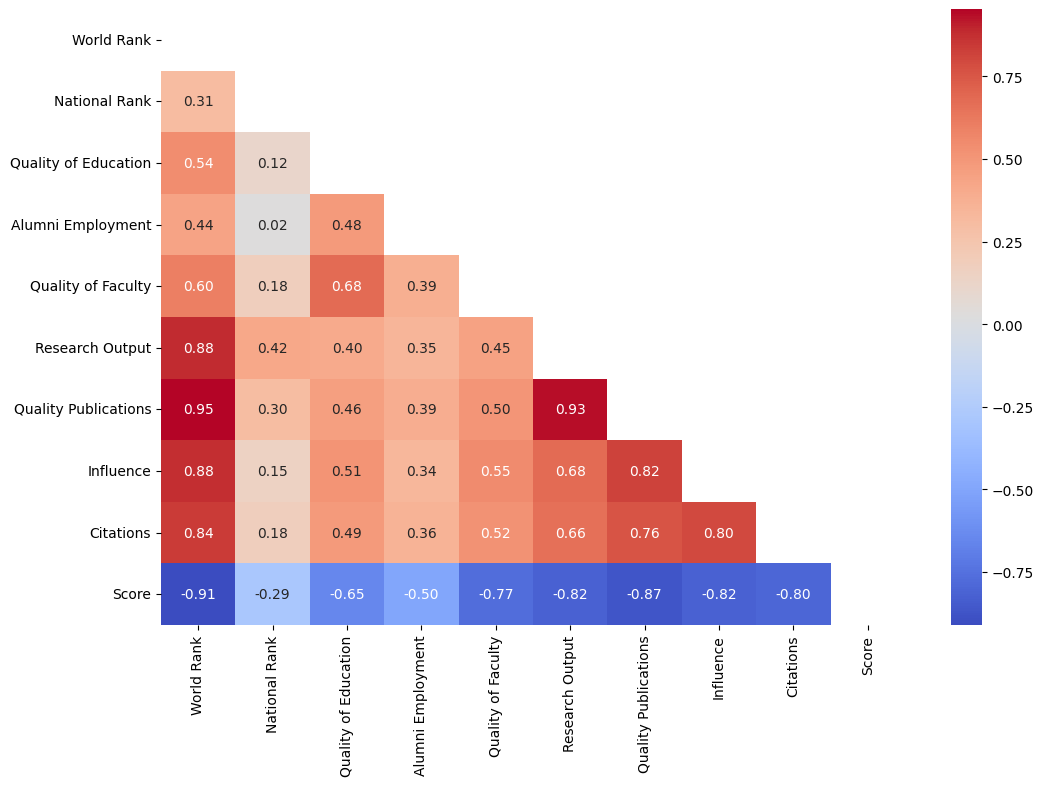

In [22]:
numerical_columns = ['World Rank', 'National Rank', 'Quality of Education', 'Alumni Employment', 
                     'Quality of Faculty', 'Research Output', 'Quality Publications', 
                     'Influence', 'Citations', 'Score']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
           mask=np.triu(correlation_matrix))

plt.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
    
<p style="color:black;">
The heatmap analysis underscores a distinct relationship between the various metrics used to evaluate universities. The <mark>Score</mark>, which ranges from a high of <mark>100</mark> to a low of <mark>69.8</mark>, is inversely related to the other ranking columns where a lower number indicates a superior ranking. The color coding on the heatmap, particularly the shades of blue, corresponds to the highest echelons of performance across the evaluated criteria.
</p>

<p style="color:black;">
It is noteworthy that the <mark>National Rank</mark> shows a unique pattern of correlation with other metrics. Since the National Rank begins at <mark>1</mark> for the top institution within each country, it inherently displays a lower correlation with global performance indicators. This is contrasted with the <mark>World Rank</mark>, which aligns more closely with other global metrics, reflecting a broader comparison of institutional performance.
</p>

<p style="color:black;">
In essence, the heatmap reveals that while higher scores are indicative of excellence, they are not the sole determinant of a university's standing. The interplay of various factors, such as research output and global influence, collectively shapes the reputation and ranking of educational institutions. This nuanced view provided by the heatmap is invaluable for understanding the multifaceted nature of university rankings.
</p>
</div>

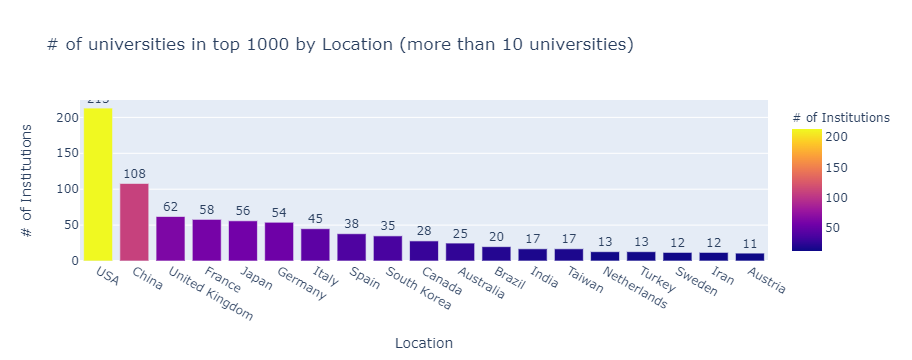

In [23]:
fig = px.bar(df_loc_info[df_loc_info['# of Institutions'] > 10], x="Location", y="# of Institutions",
             color = '# of Institutions', text = '# of Institutions',
             title="# of universities in top 1000 by Location (more than 10 universities)")
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
The bar plot specifically highlights locations with more than 10 institutions that have made it to the top 1000, offering a clear perspective on global educational prominence. The USA stands out as the leader with a staggering 213 institutions, underscoring its substantial investment in higher education. China follows with 108, indicating its growing influence in the academic sector.
</p>
</div>

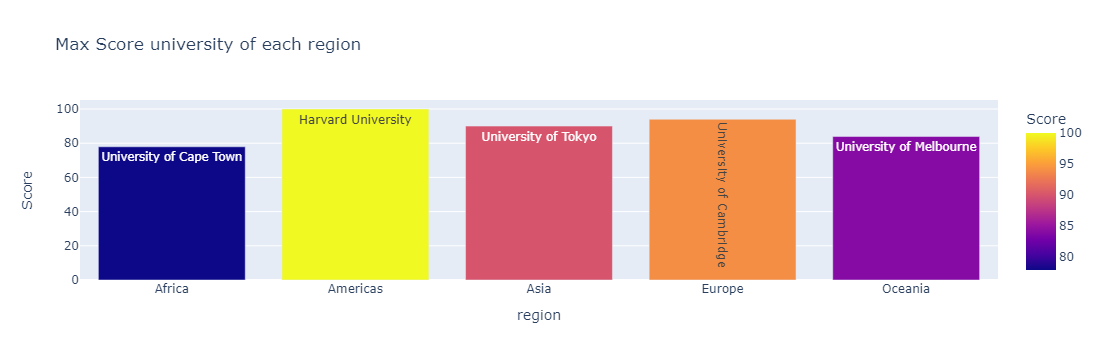

In [24]:
dfpie = df.loc[df.groupby('region')['Score'].idxmax()]
fig = px.bar(dfpie, x = 'region', y = 'Score',
            text = 'Institution', color = 'Score',
            title = 'Max Score university of each region')
fig.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
The bar chart elegantly showcases the leading universities from each region based on their scores. This visualization allows us to quickly discern which institutions are setting the benchmark within their respective regions. For instance, we can see that Harvard University is the top-scoring university in the Americas, while the University of Tokyo holds this distinction in Asia.
</p>

<p style="color:black;">
The chart not only highlights the premier institutions but also provides a comparative view of the highest educational standards across different regions. The use of color to represent scores adds a layer of depth to the analysis, making it immediately apparent which regions' top universities are scoring closer to the maximum.
</p>
</div>


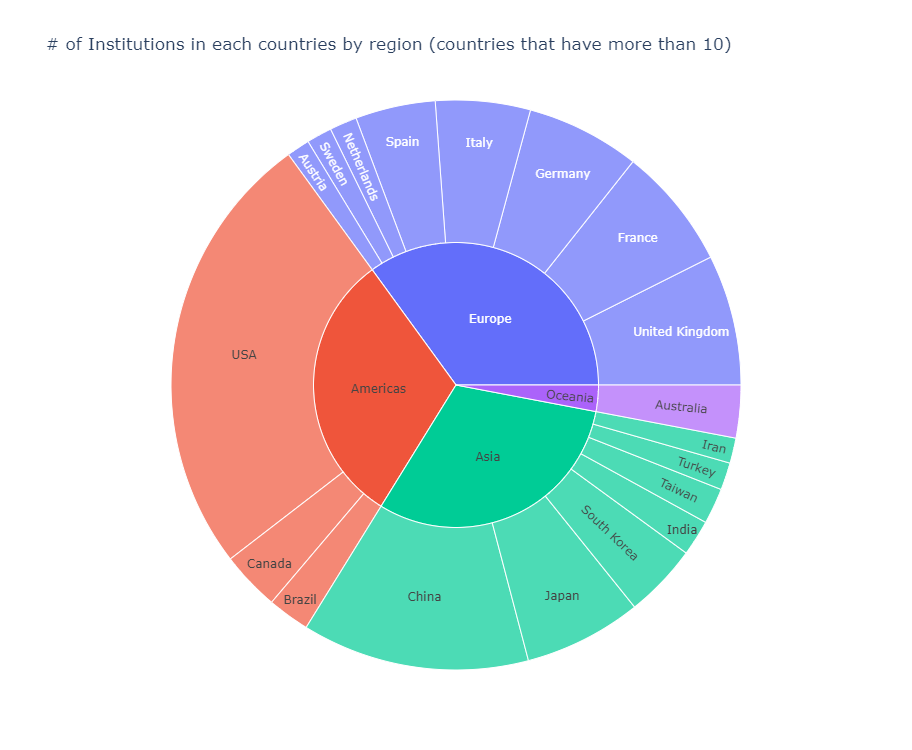

In [25]:
fig = px.sunburst(df_loc_info[df_loc_info['# of Institutions'] > 10], path=['region', 'Location'],
                  values='# of Institutions', 
                  title = '# of Institutions in each countries by region (countries that have more than 10)')
fig.update_layout(
                  width=750, 
                  height=750,
                 )
fig.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
The sunburst chart provides a hierarchical visualization of the number of institutions per country, categorized by region, focusing on countries with more than 10 institutions. This interactive graphic illustrates the educational landscape, revealing the density and distribution of universities across different regions. 
</p>

<p style="color:black;">
The innermost layer represents the regions, serving as a categorical foundation upon which the subsequent layers of countries are built. The size of each segment correlates with the number of institutions, offering a quick comparative view of educational prominence. For example, the Americas, with a substantial segment for the USA, indicates a high concentration of institutions, while other regions display their respective distributions.
</p>
</div>


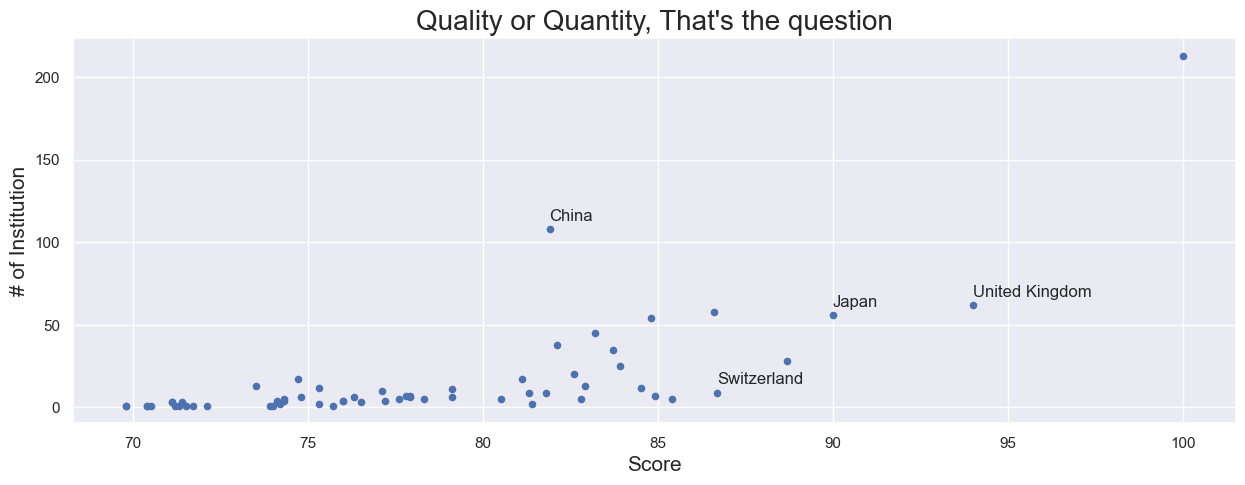

In [26]:
sns.set_theme()
fig2 , ax2 = plt.subplots(figsize = (15, 5))
df_loc_info.plot(kind = 'scatter', ax = ax2, x = 'Max Score', y = '# of Institutions')
ax2.set_xlabel('Score', fontsize = 15)
ax2.set_ylabel('# of Institution', fontsize = 15)
ax2.set_title('Quality or Quantity, That\'s the question', fontsize = 20)
ax2.text(x = 81.9, y =108+5, s = 'China')
ax2.text(x = 94.0, y =62+5, s = 'United Kingdom')
ax2.text(x = 90.0, y =56+5, s = 'Japan')
ax2.text(x = 86.7, y =9+5, s = 'Switzerland');

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
The scatter plot presents an intriguing analysis of the relationship between the number of institutions a country has and the maximum score achieved by these institutions. The visualization challenges the notion that a higher quantity of universities equates to superior quality. For instance, China, with a substantial number of institutions, does not have the highest score, while the United Kingdom, with fewer institutions, achieves a score near the top of the scale.
</p>

<p style="color:black;">
This plot underscores the complexity of educational excellence, suggesting that factors beyond sheer numbers contribute to the quality of higher education. Countries like Japan and Switzerland, with similar scores but differing numbers of institutions, further illustrate that excellence is not merely a function of quantity. The graph prompts a deeper consideration of what constitutes quality in education, steering the conversation towards the effectiveness and impact of institutions rather than their abundance.
</p>
</div>


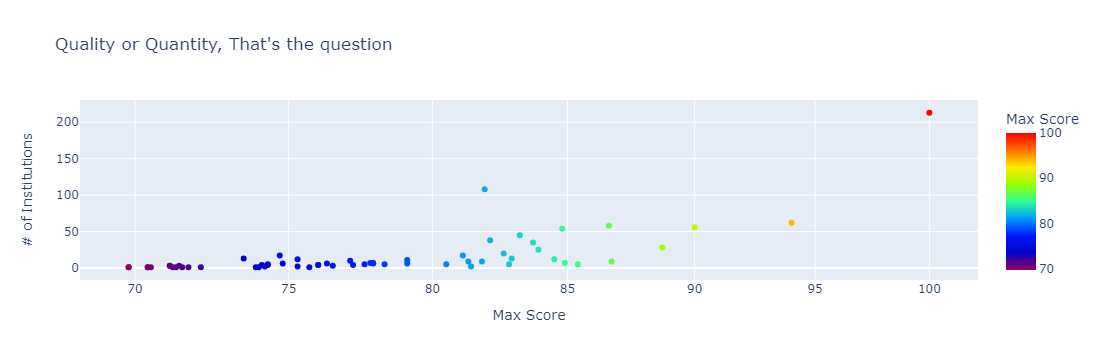

In [27]:
fig = px.scatter(df_loc_info, x = 'Max Score', y = '# of Institutions', log_x=True,
                 hover_name="Location", hover_data=["Max Score", "# of Institutions"],
                color = 'Max Score', color_continuous_scale= 'rainbow',
                title = 'Quality or Quantity, That\'s the question')

fig.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
As users hover their mouse over each dot, they can see the specific 'Location' along with its corresponding 'Max Score' and '# of Institutions'. This feature enriches the user experience by allowing for an immediate and detailed understanding of each country's educational standing. The color-coding further aids in distinguishing between the scores, making it visually intuitive to identify locations with higher educational quality.
</p>
</div>


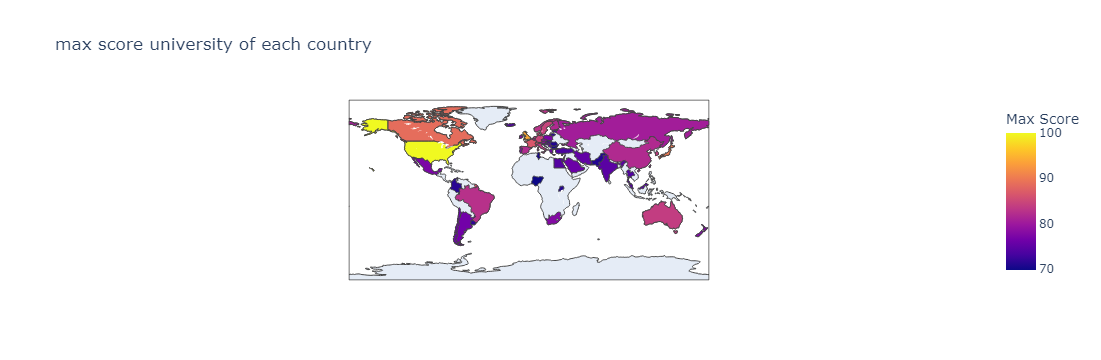

In [28]:
fig = px.choropleth(df_loc_info, locations="Location",
                    color="Max Score",
                    locationmode = 'country names',
                    hover_data=["Location", "subregion", 'Max Score', '# of Institutions'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title = 'max score university of each country')
fig.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
    <font color = black>
<p style="color:black;">
The choropleth map offers a global perspective on the highest scoring universities by country. The map uses a color gradient to indicate the maximum score achieved by universities within each country, providing a visual comparison of educational excellence worldwide.
</p>

<p style="color:black;">
By hovering over a country, additional information is displayed, including the country's name, subregion, maximum score, and the number of institutions. This interactive feature enriches the data exploration experience, enabling a deeper understanding of the educational landscape across different regions.
</p>
    </font>
</div>


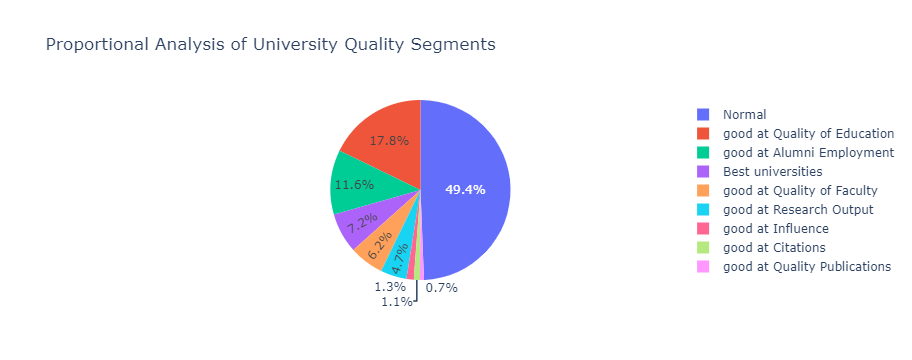

In [29]:
dfpie = df.groupby('Segment')['Score'].count()
fig = px.pie(values=dfpie.values, names=dfpie.index, 
            title = 'Proportional Analysis of University Quality Segments')
fig.show()

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left">
<p style="color:black;">
The pie chart offers a visual breakdown of universities categorized by various quality segments. The largest portion of the chart is occupied by the 'Normal' category, suggesting that a significant number of universities fall into this segment. Other slices represent universities that excel in specific areas such as 'Quality of Education', 'Alumni Employment', and those considered 'Best universities'.
</p>

<p style="color:black;">
This distribution provides valuable insights into the landscape of higher education quality. It highlights the proportion of institutions that have achieved excellence in particular domains and those that have room for improvement. Stakeholders in the education sector can use this information to identify areas where resources can be allocated to enhance quality and performance.
</p>
</div>

In [30]:
# Initialize the Dash app
app1 = Dash(__name__)

# Define the layout of the app
app1.layout = html.Div([
    # Title of the dashboard
    html.H4('Segment of universities for each country'),
    # Prompt for the user to select a country
    html.P("Select country:"),
    # Dropdown menu for selecting a country
    dcc.Dropdown(
        id='Location',  # Unique identifier for the dropdown
        # Options for the dropdown are generated from the unique values in the 'Location' column of the DataFrame
        options=[{'label': i, 'value': i} for i in df['Location'].unique()],
        # The default value is set to the 34th unique entry in the 'Location' column, which represents Greece
        value=df['Location'].unique()[33],
        clearable=False  # The dropdown selection cannot be cleared, ensuring a value is always selected
    ),
    # Graph component that will display the sunburst chart
    dcc.Graph(id="graph"),
], style={'backgroundColor': '#f0f0f0'})

# Define the callback function to update the graph based on the selected country
@app1.callback(
    Output("graph", "figure"),  # The component property to be updated is the figure of the graph component
    [Input("Location", "value")])  # The input triggering the callback is the value of the 'Location' dropdown
def update_graph(selected_location):
    # Filter the DataFrame based on the selected country
    filtered_df = df[df['Location'] == selected_location]
    # Generate a sunburst chart using the filtered DataFrame
    fig = px.sunburst(filtered_df, path=['Segment', 'Institution'], values='Score')
    fig.update_layout(
                  width=600, 
                  height=600,
                 )
    # Return the figure to update the graph component
    return fig

if __name__ == '__main__':
    app1.run_server(debug=True, port=8050)  # Specify a unique port if needed

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left"> 
<p style="color:black;">
The interactive dashboard created with Dash provides a user-friendly interface for exploring the segmentation of universities within a selected country. The sunburst chart, which updates based on the country chosen from the dropdown menu, visually breaks down the universities into segments that reflect their areas of excellence. This tool allows stakeholders to click on each segment and delve into the specific universities that excel in particular segments, such as ‘Quality of Education’ or ‘Research Output’. It’s a valuable resource for prospective students, academic researchers, and policymakers to analyze the strengths of universities in a detailed and engaging manner. 
</p> 
</div>

In [31]:
# Initialize the Dash app
app2 = Dash(__name__)

# Define the layout of the app
app2.layout = html.Div([
    html.H4('Compare Institutions Based on Various Criteria'),
    html.P("Select the first institution:"),
    dcc.Dropdown(
        id='institution-dropdown-1',
        options=[{'label': i, 'value': i} for i in df_inverted['Institution'].unique()],
        value=df_inverted['Institution'].unique()[136]  # Default value is the 137th institution
    ),
    html.P("Select the second institution:"),
    dcc.Dropdown(
        id='institution-dropdown-2',
        options=[{'label': i, 'value': i} for i in df_inverted['Institution'].unique()],
        value=df_inverted['Institution'].unique()[250]  # Default value is the 251th institution
    ),
    dcc.Graph(id='scatterpolar-graph')
], style={'backgroundColor': '#f0f0f0'})

# Define the callback function to update the graph based on the selected institutions
@app2.callback(
    Output('scatterpolar-graph', 'figure'),
    [Input('institution-dropdown-1', 'value'),
     Input('institution-dropdown-2', 'value')]
)
def update_graph(selected_institution_1, selected_institution_2):
    # Filter the DataFrame for the first selected institution
    filtered_df_1 = df_inverted[df_inverted['Institution'] == selected_institution_1]
    # Filter the DataFrame for the second selected institution
    filtered_df_2 = df_inverted[df_inverted['Institution'] == selected_institution_2]
    
    # Create a scatterpolar plot with connected lines for the first institution
    trace1 = go.Scatterpolar(
        r=filtered_df_1[['Quality of Education', 'Alumni Employment', 'Quality of Faculty', 
                         'Research Output', 'Quality Publications', 'Influence', 'Citations']].values.flatten(),
        theta=['Quality of Education', 'Alumni Employment', 'Quality of Faculty', 
               'Research Output', 'Quality Publications', 'Influence', 'Citations'],
        fill='toself',
        name=selected_institution_1
    )
    
    # Create a scatterpolar plot with connected lines for the second institution
    trace2 = go.Scatterpolar(
        r=filtered_df_2[['Quality of Education', 'Alumni Employment', 'Quality of Faculty', 
                         'Research Output', 'Quality Publications', 'Influence', 'Citations']].values.flatten(),
        theta=['Quality of Education', 'Alumni Employment', 'Quality of Faculty', 
               'Research Output', 'Quality Publications', 'Influence', 'Citations'],
        fill='toself',
        name=selected_institution_2
    )
    
    # Combine the traces
    fig = go.Figure(data=[trace1, trace2])
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1000]
            )),
        title='Comparison of Two Institutions'
    )
    return fig

# Run app2 with debug mode enabled
if __name__ == '__main__':
    app2.run_server(debug=True, port=8051)  # Use a different unique port

<div style="border-radius:10px; padding: 10px; background-color: #c0e5e9; font-size:115%; text-align:left"> 
<p style="color:black;">
The interactive scatterpolar plot created in the Dash app offers a dynamic way to compare two institutions based on various performance criteria. Users can select any two universities from the dropdown menus and instantly see a visual comparison across dimensions such as Quality of Education, Alumni Employment, and Research Output. The radial layout of the plot allows for an intuitive understanding of how each institution fares in comparison to the other, with the ability to identify areas of strength and opportunities for improvement. This tool is particularly useful for prospective students, faculty, or educational researchers interested in the comparative analysis of academic institutions. 
</p> 
</div>

<font style="font-family:'Times New Roman', serif; font-size:200%;font-weight:bold;color:magenta;"> Best Regards!</font><br>